### Programming language of the year

Let's import the data from Stack Overflow Survey 2020

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scripts as s
from IPython import display
%matplotlib inline

schema = pd.read_csv('./data/survey_results_schema.csv')
df = pd.read_csv('./data/survey_results_public.csv')

# df = df.head(100)

df.head(10)[s.desired_columns]

,Respondent,LanguageWorkedWith,LanguageDesireNextYear,Employment,YearsCodePro,MainBranch,OrgSize
0,1,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,"Independent contractor, freelancer, or self-em...",27,I am a developer by profession,2 to 9 employees
1,2,JavaScript;Swift,Python;Swift,Employed full-time,4,I am a developer by profession,"1,000 to 4,999 employees"
2,3,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,I code primarily as a hobby,NaN
3,4,NaN,NaN,NaN,4,I am a developer by profession,20 to 99 employees
4,5,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Employed full-time,8,"I used to be a developer by profession, but no...",NaN
5,6,HTML/CSS;Java;JavaScript,HTML/CSS;Java;JavaScript,Employed full-time,4,I am a developer by profession,NaN
6,7,C#;HTML/CSS;PHP,C#;HTML/CSS;PHP,Employed full-time,4,I am a developer by profession,20 to 99 employees
7,8,Python;SQL,JavaScript,Employed full-time,13,I am a developer by profession,20 to 99 employees
8,9,HTML/CSS;JavaScript;PHP,Python;Rust,"Independent contractor, freelancer, or self-em...",4,I am a developer by profession,"Just me - I am a freelancer, sole proprietor, ..."
9,10,HTML/CSS;Java;JavaScript;Python;SQL,HTML/CSS;Java;JavaScript;Python;R;SQL,Employed full-time,4,I am a developer by profession,2 to 9 employees


How big the data is ?

In [2]:
df.shape[0], df.shape[1]

(64461, 61)

Our focus is programming languages, let's see how many null values are present ?

In [3]:
df.LanguageWorkedWith.isnull().mean(), df.LanguageDesireNextYear.isnull().mean()

(0.10988039279564388, 0.16053117388808738)

1% respondent didn't reveal the Language they worked with this year. Safe to ignore. Let's visulaize Language for rest.

In [4]:
lang_worked_df = df[df['LanguageWorkedWith'].notna()]

lang_worked_df.head()[s.desired_columns]

,Respondent,LanguageWorkedWith,LanguageDesireNextYear,Employment,YearsCodePro,MainBranch,OrgSize
0,1,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,"Independent contractor, freelancer, or self-em...",27,I am a developer by profession,2 to 9 employees
1,2,JavaScript;Swift,Python;Swift,Employed full-time,4,I am a developer by profession,"1,000 to 4,999 employees"
2,3,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,I code primarily as a hobby,NaN
4,5,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Employed full-time,8,"I used to be a developer by profession, but no...",NaN
5,6,HTML/CSS;Java;JavaScript,HTML/CSS;Java;JavaScript,Employed full-time,4,I am a developer by profession,NaN


Oops. LanguageWorkedWith got multiple mix & match. Let's clean it up & visualize.

In [5]:
lang_worked_cleaned_df = s.clean_series(lang_worked_df, "LanguageWorkedWith", "Language", "Users")
sorted_lang_worked_cleaned_df = lang_worked_cleaned_df.sort_values("Users", ascending=False)

sorted_lang_worked_cleaned_df

,Language,Users
2,JavaScript,38822
1,HTML/CSS,36181
7,SQL,31413
5,Python,25287
8,Java,23074
12,Bash/Shell/PowerShell,18980
0,C#,18041
9,PHP,15007
11,TypeScript,14578
18,C++,13707


Let's visualize language with graph 

<AxesSubplot:xlabel='Users', ylabel='Language'>

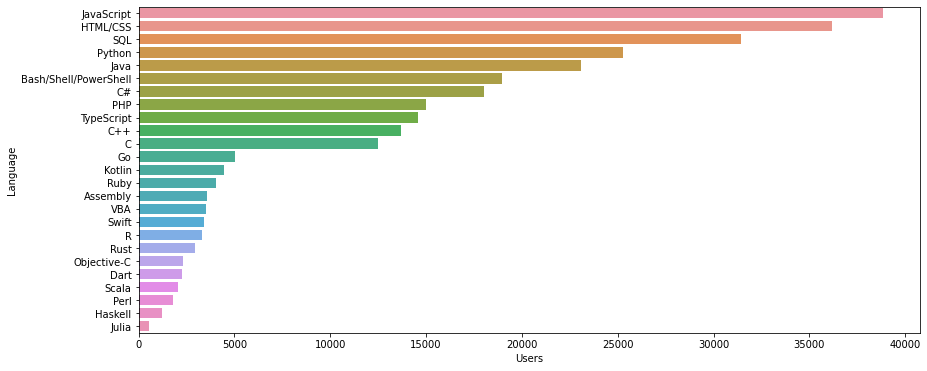

In [6]:
plt.figure(figsize=(14,6))
sns.barplot(data = sorted_lang_worked_cleaned_df , y = 'Language',x = 'Users',)

Many of the respondents were students, part-time developers & programming enthusiasts. Let's see how many are serious developers ?

In [7]:
dev_df = pd.DataFrame(lang_worked_df.query("Employment == 'Employed full-time' and YearsCodePro > '1' and MainBranch == 'I am a developer by profession' "))

dev_df_cleaned_df = s.clean_series(dev_df, "LanguageWorkedWith", "Language", "Developers")
sorted_dev_cleaned_df = dev_df_cleaned_df.sort_values("Developers", ascending=False)

sorted_dev_cleaned_df

,Language,Developers
0,JavaScript,22469
2,HTML/CSS,19535
7,SQL,18106
6,Python,12241
3,Java,12184
9,Bash/Shell/PowerShell,11154
4,C#,10843
11,TypeScript,9787
5,PHP,7607
12,C++,5987


How does usage look for mainstream developers ?

<AxesSubplot:xlabel='Developers', ylabel='Language'>

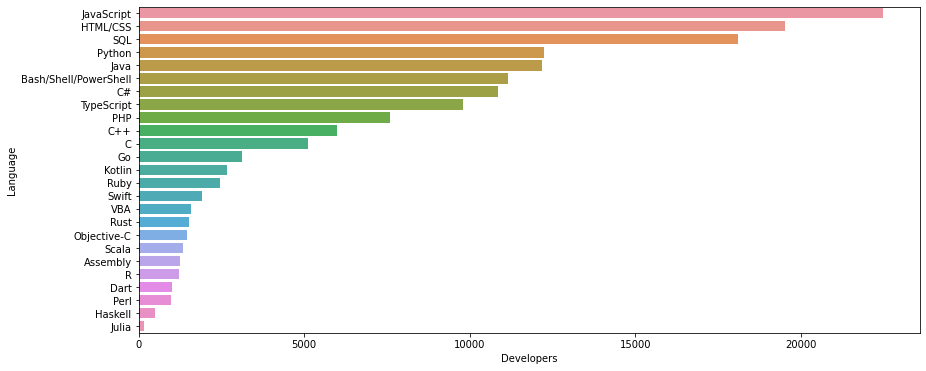

In [8]:
plt.figure(figsize=(14,6))
sns.barplot(data = sorted_dev_cleaned_df , y = 'Language',x = 'Developers',)

How about small v/s big orgs used ?

<AxesSubplot:xlabel='Developers', ylabel='Language'>

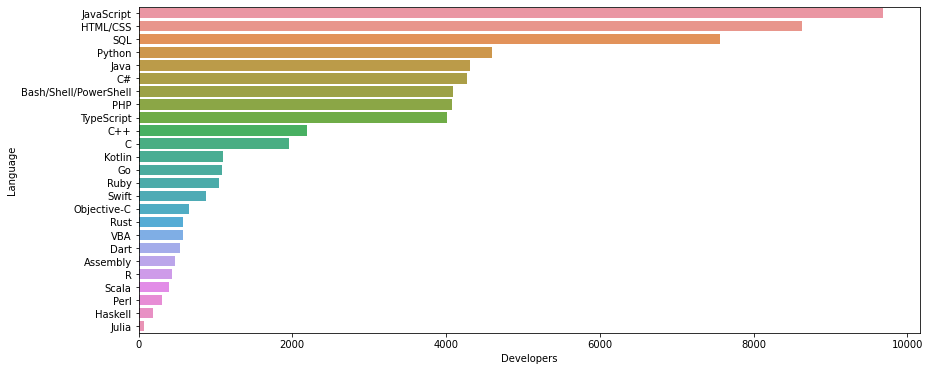

In [9]:
org_small_df = pd.DataFrame(dev_df.query("OrgSize in ['20 to 99 employees', 'Just me - I am a freelancer, sole proprietor, etc.','2 to 9 employees','10 to 19 employees']"))
org_small_df_cleaned_df = s.clean_series(org_small_df, "LanguageWorkedWith", "Language", "Developers")
sorted_org_small_df_cleaned_df = org_small_df_cleaned_df.sort_values("Developers", ascending=False)
plt.figure(figsize=(14,6))
sns.barplot(data = sorted_org_small_df_cleaned_df , y = 'Language',x = 'Developers',)

<AxesSubplot:xlabel='Developers', ylabel='Language'>

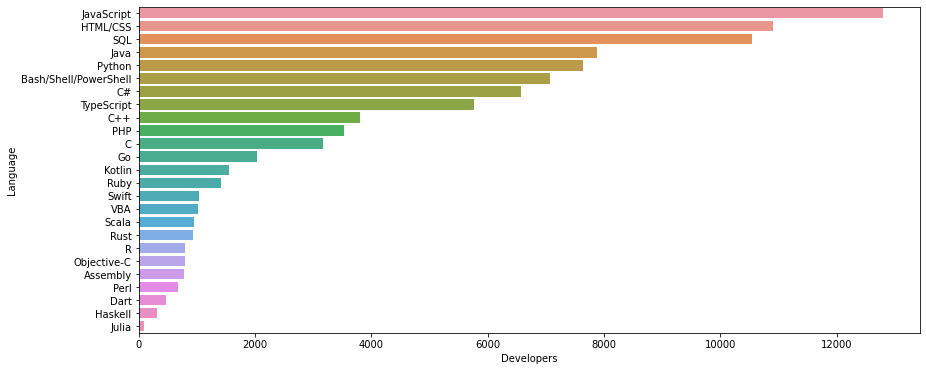

In [10]:
org_large_df = pd.DataFrame(dev_df.query("OrgSize not in ['20 to 99 employees', 'Just me - I am a freelancer, sole proprietor, etc.','2 to 9 employees','10 to 19 employees']"))
org_large_df_cleaned_df = s.clean_series(org_large_df, "LanguageWorkedWith", "Language", "Developers")
sorted_org_large_df_cleaned_df = org_large_df_cleaned_df.sort_values("Developers", ascending=False)
plt.figure(figsize=(14,6))
sns.barplot(data = sorted_org_large_df_cleaned_df , y = 'Language',x = 'Developers',)

Languages worked this year v/s desired for next year ?

[Text(0, 0.5, 'Language'),
 Text(0.5, 0, '% Developers who want to keep using it')]

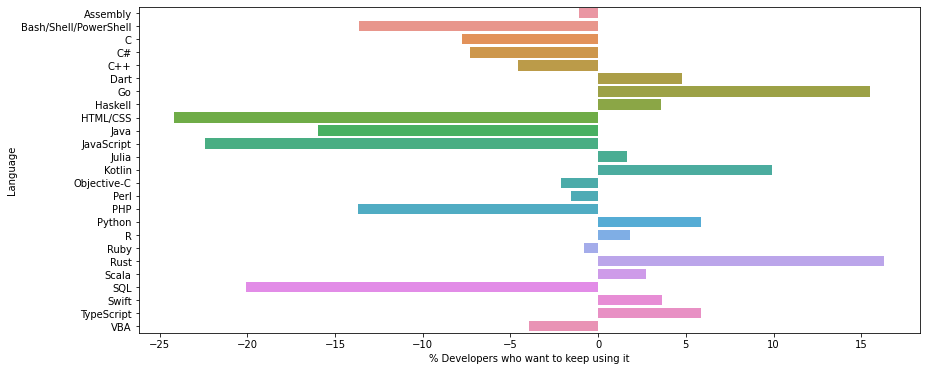

In [11]:
lang_desired_df = dev_df[dev_df['LanguageDesireNextYear'].notna()]

lang_desired_cleaned_df = s.clean_series(lang_desired_df, "LanguageDesireNextYear", "Language", "Developers")
sorted_lang_desired_cleaned_df = lang_desired_cleaned_df.sort_values("Developers", ascending=False)

lang_worked_desired_cleaned_df = s.clean_series(lang_desired_df, "LanguageWorkedWith", "Language", "Developers")
sorted_lang_worked_desired_cleaned_df = lang_worked_desired_cleaned_df.sort_values("Developers", ascending=False)

dic1 = sorted_lang_desired_cleaned_df.set_index('Language')['Developers'].to_dict()
dic2 = sorted_lang_worked_desired_cleaned_df.set_index('Language')['Developers'].to_dict()

dic1, dic2

desire_df = pd.DataFrame(
    [l, 100 * (dic1[l] - dic2[l])/(lang_desired_df.shape[0])] for l in s.languages
)

desire_df
plt.figure(figsize=(14,6))
plt.xlabel("Ddf")
plt.ylabel("Values")
ax = sns.barplot(data = desire_df , y = 0,x = 1)
ax.set(ylabel='Language', xlabel='% Developers who want to keep using it')




Let's focus on Java

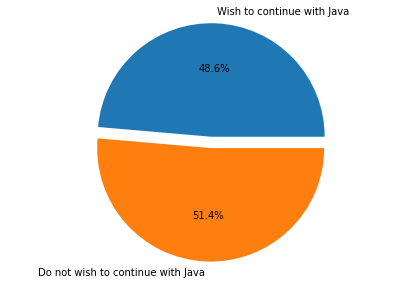

In [12]:
# lang_desired_df = dev_df[dev_df['LanguageDesireNextYear'].notna()]
java_df = lang_desired_df[ lang_desired_df['LanguageWorkedWith'].str.contains("Java(?!Script)")]
java_df.head()[s.desired_columns]

java_desired_no_java_df = java_df[ ~ java_df['LanguageDesireNextYear'].str.contains("Java(?!Script)")]
java_desired_no_java_df.head(10)[s.desired_columns]

java_desired_no_java_df.shape[0], java_df.shape[0], java_desired_no_java_df.shape[0]/java_df.shape[0]

java_not_desired_perc = java_desired_no_java_df.shape[0]/java_df.shape[0]

labels = ['Wish to continue with Java', 'Do not wish to continue with Java']
sizes = [1-java_not_desired_perc, java_not_desired_perc]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=0)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()


How about JavaScript

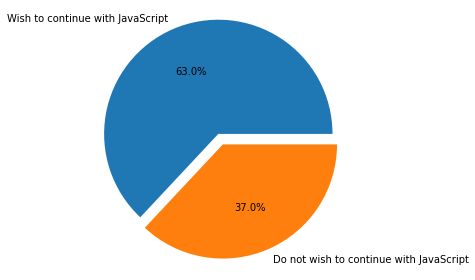

In [13]:
# lang_desired_df = dev_df[dev_df['LanguageDesireNextYear'].notna()]
js_df = lang_desired_df[ lang_desired_df['LanguageWorkedWith'].str.contains("JavaScript")]
js_df.head()[s.desired_columns]

js_desired_no_js_df = js_df[ ~ js_df['LanguageDesireNextYear'].str.contains("JavaScript")]
js_desired_no_js_df.head(10)[s.desired_columns]

js_desired_no_js_df.shape[0], js_df.shape[0], js_desired_no_js_df.shape[0]/js_df.shape[0]

js_not_desired_perc = js_desired_no_js_df.shape[0]/js_df.shape[0]

labels = ['Wish to continue with JavaScript', 'Do not wish to continue with JavaScript']
sizes = [1-js_not_desired_perc, js_not_desired_perc]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=0)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

Kotlin as an alternative to Java ?

In [14]:
java_desired_kotlin_df = java_df[ java_df['LanguageDesireNextYear'].str.contains("Kotlin")]
java_desired_kotlin_df.shape[0], java_df.shape[0], java_desired_kotlin_df.shape[0]/java_df.shape[0]


(3788, 11519, 0.3288479902769338)

Go as an alternative to Java ?

In [15]:
java_desired_go_df = java_df[ java_df['LanguageDesireNextYear'].str.contains("Go")]
java_desired_go_df.shape[0], java_df.shape[0], java_desired_go_df.shape[0]/java_df.shape[0]

(3254, 11519, 0.28248979946175884)

TypeScript as an alternative to JavaScript ?

In [16]:
js_desired_ts_df = js_df[ js_df['LanguageDesireNextYear'].str.contains("TypeScript")]
js_desired_ts_df.shape[0], js_df.shape[0], js_desired_ts_df.shape[0]/js_df.shape[0]


(9843, 21140, 0.4656102175969726)

Dart as an alternative to JavaScript ?

In [17]:
js_desired_dart_df = js_df[ js_df['LanguageDesireNextYear'].str.contains("Dart")]
js_desired_dart_df.shape[0], js_df.shape[0], js_desired_dart_df.shape[0]/js_df.shape[0]


(1834, 21140, 0.08675496688741721)